<a href="https://colab.research.google.com/github/taimur1871/covid_spread/blob/main/Rana_Assignment_Week0_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Exercise shows how to use Google colab to apply regression models.**
**Copy the Colab notebook and data to your google drive before proceeding.**

Step 1: Connect Google drive that stores the data with your Google Colab Notebook

In [ ]:
import numpy as np
import numpy.matlib as matlib
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


Replace the ID with ID of file you want to access. To get this ID: 

1.   Right-click on the name of the appropriate file in your Google Drive
2.   Click "Get link"
3.   Copy the characters between `d/` and the following slash
4.   Paste them into the dictionary argument of the call to `drive.CreateFile()` as the value associated with the 'id' key. Make sure that this value is a string.



In [ ]:
# Replace the ID with ID of file you want to access
# To get this ID, right-click on the name of the appropriate file in your 
downloaded = drive.CreateFile({'id':'1JIPldDJF841NYVLGO18AAXXKP_etwsfs'}) 
downloaded.GetContentFile('time_series_covid_19_confirmed.csv') 

Step 2: Read the Data and verify its format!

In [ ]:
import pandas as pd
data = pd.read_csv('time_series_covid_19_confirmed.csv') 
print("The shape of data=",data.shape)
data.head()

The shape of data= (266, 225)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977,981,989,989,989,1005,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


Step 3: Original data has [266x225] dimensions. Let's use only 50 rows and 100 columns.

In [ ]:
rows=50
cols=100
data_new=data.iloc[:rows,4:cols+4]
print(data_new.shape)

(266, 100)


### Data for Q2

Step 3: For Q2 using all data for first 100 days

In [ ]:
cols=100
data_new_q2=data.iloc[:,4:cols+4]
print(data_new_q2.shape)

NameError: ignored

In [ ]:
#view the sub-sectioned data
data_new.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


Step 4: Convert the Tablular data to format {X,Y}, where X={Longitude, Latitude, Date}, Y={#infected}

In [ ]:
# Finding the date indices
import matplotlib.pyplot as plt
data_row=data_new.sum(axis=0)
days=range(0,data_row.shape[0])
days_mat=matlib.repmat(np.array(days),data_new.shape[0],1)
print(days_mat.shape)

(266, 100)


In [ ]:
# Let's create data X-{X1,X2,X3}, where X1=lat, X2=long, X3=date, Y=#affected
X=np.zeros((days_mat.shape[0]*days_mat.shape[1],3))
Y=np.zeros((days_mat.shape[0]*days_mat.shape[1],1))
lat_long=np.array(data.iloc[:,2:4])
data_new=np.array(data_new)
for r in range(days_mat.shape[0]): #all locations
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],0]=lat_long[r,0]*np.ones((days_mat.shape[1],)) #setting Latitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],1]=lat_long[r,1]*np.ones((days_mat.shape[1],)) #setting Longitude
  X[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1],2]=np.reshape(days,(days_mat.shape[1],)) #setting the date
  Y[r*days_mat.shape[1]:r*days_mat.shape[1]+days_mat.shape[1]]=np.reshape(data_new[r,:],((days_mat.shape[1],1)))

In [ ]:
print(np.shape(X))
#Data Preparation is Done!

(26600, 3)


Step 5: Let's Plot the Data to see the converted Data format!

(26600, 3)


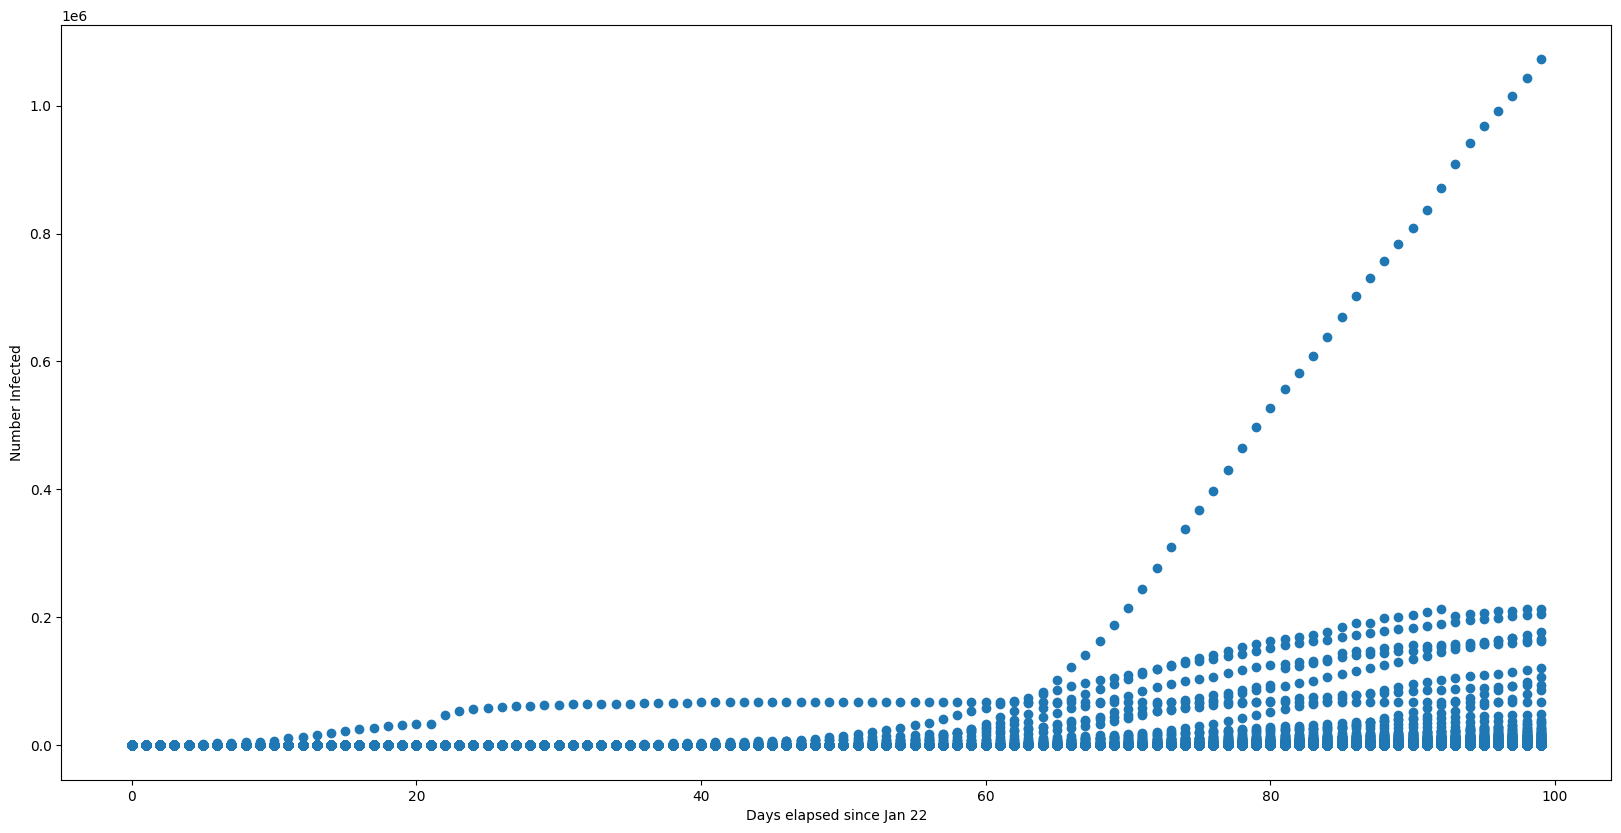

In [ ]:
plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(X[:,2],Y[:])
plt.xlabel('Days elapsed since Jan 22')
plt.ylabel('Number Infected')
print(np.shape(X))

Step 6: Let's spilt the data to training and test (70% train, 30% test)

In [ ]:
# Goal 1: Fit regression model for (days vs infections)
from sklearn.model_selection import train_test_split
# Split data into train and test
X_train_1, X_test_1, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

Step 7: Let's fit Polynomial features of degree 3 to the features. This results in dimensions going from 3 to 20!

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
# Transform both the train and test data
X_train = poly.fit_transform(X_train_1)
X_test = poly.fit_transform(X_test_1)
print("New shape of test data=",np.shape(X_test))

clf = LinearRegression()
# Fit the model on train data only
clf.fit(X_train, y_train)
print("Linear Regression Coefficients are=",clf.coef_)
print("constant coefficient=",clf.intercept_)

New shape of test data= (7980, 20)
Linear Regression Coefficients are= [[ 0.00000000e+00  1.08195512e+02 -8.71484631e+00  3.30917339e+01
   2.20377196e+00  2.99669211e-01 -3.10917313e+00 -7.66337768e-02
   2.15786083e+00 -3.15576805e+00 -7.42616605e-02  3.12719044e-03
   1.43317729e-02  1.43412794e-04 -1.98682060e-02  6.46817673e-02
  -1.64113263e-03  4.98198787e-03 -3.00181677e-02  3.44067676e-02]]
constant coefficient= [-739.12870003]


## Trying various values of polynomial degrees to find best model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for i in range(2, 16):
  poly = PolynomialFeatures(degree=i)
  # Transform both the train and test data
  X_train = poly.fit_transform(X_train_1)
  X_test = poly.fit_transform(X_test_1)

  clf = LinearRegression()
  # Fit the model on train data only
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print('MSE for ', i, 'is', mse(y_test, y_pred))

MSE for  2 is 594035751.3547198
MSE for  3 is 590117458.2663462
MSE for  4 is 580506402.3332816
MSE for  5 is 560518228.2611809
MSE for  6 is 540203782.7726618
MSE for  7 is 505524398.9424652
MSE for  8 is 424450404.2769667
MSE for  9 is 323233058.7821498
MSE for  10 is 246240117.31611308
MSE for  11 is 285730478.01857233
MSE for  12 is 160243568.3549583
MSE for  13 is 143240021.76617464
MSE for  14 is 139863606.36987805
MSE for  15 is 167534460.6392667


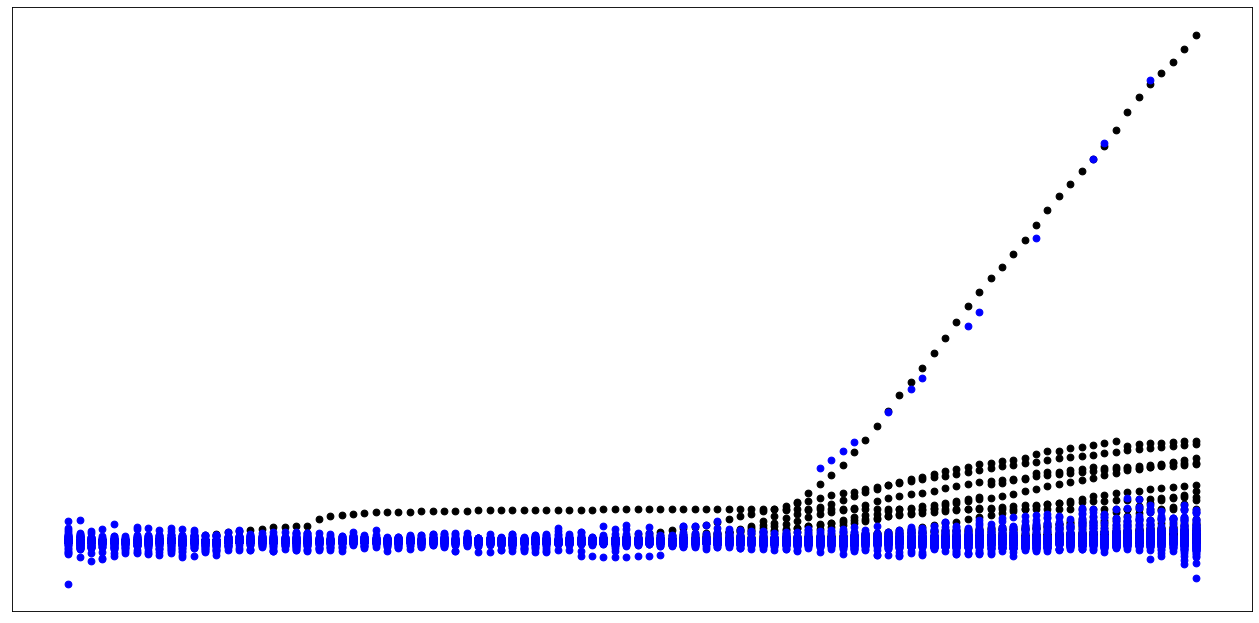

In [ ]:
# Predict regression outcome on test data
y_pred = clf.predict(X_test)
# next plot predictions
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(X[:,2], Y[:,0],  color='black')
plt.scatter(X_test_1[:,2], y_pred, color='blue', linewidth=1)
plt.xticks(())
plt.yticks(())

plt.show()

In the image above, black points are training and blue ones are test!

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test, y_pred))

560518228.2611809


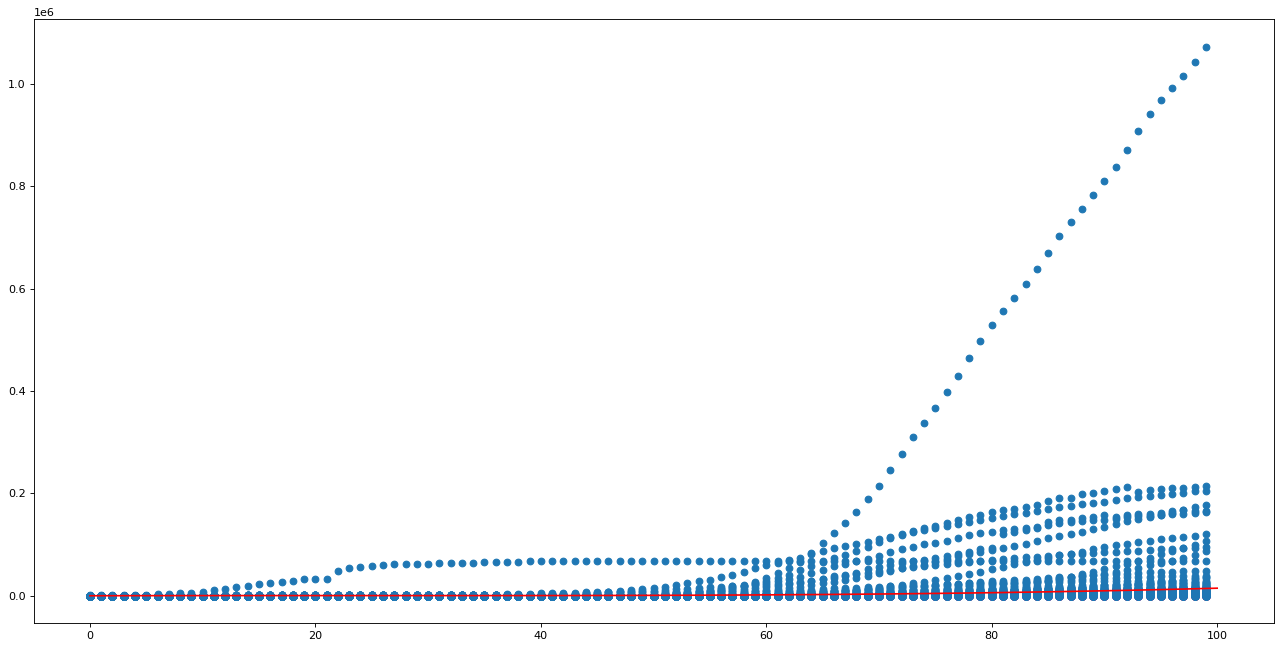

In [ ]:
# 1D polynomial regression
model = np.poly1d(np.polyfit(np.transpose(X_train_1[:,2]), np.transpose(y_train[:,0]), 3))

model_x = np.linspace(0, 100, 100)
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(X[:,2],Y[:])
plt.plot(model_x, model(model_x),'r')
plt.show()

In [ ]:
#Assignment: Report the mean squared error for prediction using differnt degrers of Polynomial Regression
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#1. Report the best model for this data

#2. Repeat for complete data (Change step 3) and report the best model


## Question 2

used full data and tried a large number of polynomial degrees. The results are given below, probably overfitting significantly
* MSE for  2 is 594035751.3547198
* MSE for  3 is 590117458.2663462
* MSE for  4 is 580506402.3332816
* MSE for  5 is 560518228.2611809
* MSE for  6 is 540203782.7726618
* MSE for  7 is 505524398.9424652
* MSE for  8 is 424450404.2769667
* MSE for  9 is 323233058.7821498
* MSE for  10 is 246240117.31611308
* MSE for  11 is 285730478.01857233
* MSE for  12 is 160243568.3549583
* MSE for  13 is 143240021.76617464
* ***MSE for  14 is 139863606.36987805***
* MSE for  15 is 167534460.6392667
